# Linear regression on the Iris dataset

The [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) as taken from sklearn is an example of an unsupervised multiclass - classification problem.

### Importing useful libraries: 

In [1]:
#for computation:
import pandas as pd
import numpy as np

#for dataset
from sklearn.datasets import load_iris

#for data plotting and visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

[sklearn.datasets.load_iris](https://github.com/scikit-learn/scikit-learn/blob/95d4f0841/sklearn/datasets/_base.py#L326).

### Setting up the data & visualising it: 

In [3]:
def addnames(Y):
    Ynames = []
    for i in Y:
        if i == 0:
            Ynames.append("setosa")
        elif i == 1:
            Ynames.append("versicolour")
        elif i == 2: 
            Ynames.append("virginica")
            
    return Ynames


X = load_iris().data
Y = load_iris().target


Ynames = addnames(Y)
df = pd.DataFrame(X, columns = ['sl', 'sw', 'pl', 'pw'])
df["species"] = Ynames

df.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


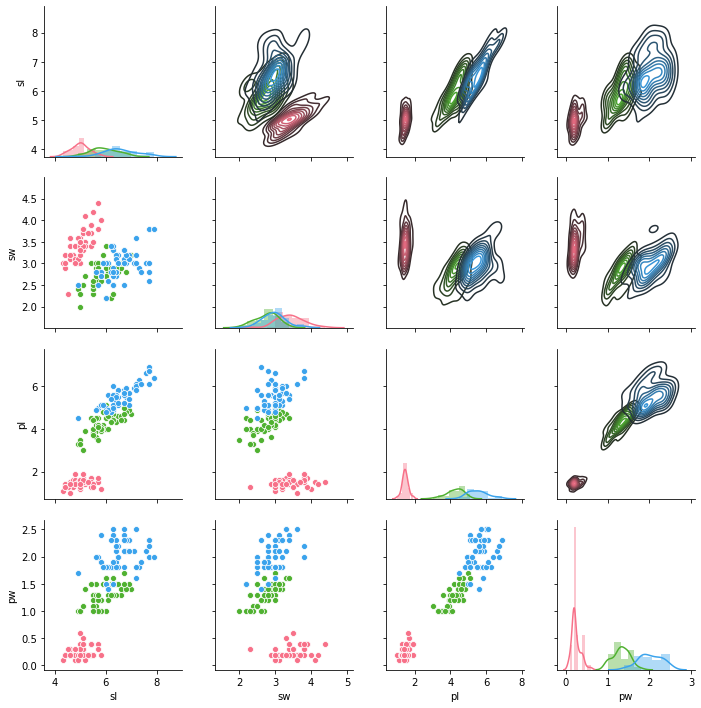

In [5]:
g = sns.PairGrid(df)

g.hue_vals = df["species"]
g.hue_names = df["species"].unique()
g.palette = sns.color_palette("husl", len(g.hue_names))

g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
g.map_diag(sns.distplot)


plt.show()

### Hyper Parameters

In [6]:
# np.random.seed(0)
weights = np.random.randn(1, 4)
bias = 0
iters = 1000
alpha = 0.01 # Same as learning rate
Y = Y.reshape(150, 1)
print(X.shape)
print(Y.shape)
print(weights.shape)

(150, 4)
(150, 1)
(1, 4)


### Useful functions

In [7]:
# Cost based on MSE
# Activated prediction is not used
def computeCost(X, y, weights, bias):
    m = len(X)
    prediction = np.dot(X, weights.T) + bias
    cost = (1/2*m) * np.sum(np.square(prediction - y))
    return cost

In [8]:
# Stochastic Gradient Descent to find minima

def gradientDescent(X, y, weights, bias, iters, alpha):
    cost = np.zeros(iters)
    m = len(X)
        
    for i in range (iters):   
        prediction = np.dot(X, weights.T) + bias
#        print(prediction.shape)
#        error = y - prediction
#        print(error.shape)
        
        dw = (-2/m) * sum(X * (Y - prediction))
        db = (-2/m) * sum(Y - prediction)
        
        weights -= alpha * dw
        bias -= alpha * db
    
#         print (weights)
#         print (bias)
        
        cost[i] = computeCost(X, y, weights, bias)
        
#         print (cost[i])
        
    return weights, bias, cost

In [9]:
# Function to predict for a single set of data

def predict(X, weights, bias):
    return np.dot(X, weights.T) + bias

In [10]:
# Basic Activation function for classification

def activated(predictions):
    p = []
    
    for i in range(len(predictions)):
        if predictions[i] <= 0.5:
            p.append(0)
        elif predictions[i] <= 1.5:
            p.append(1)
        else:
            p.append(2)
    
    return p

### Calling the Model and Graphing Cost

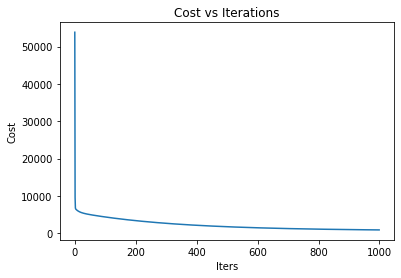

In [11]:
weights, bias, cost = gradientDescent(X, Y, weights, bias, iters, alpha)
# plt.rcParams["figure.figsize"] = (20,10)

ax = plt.subplot(111)
ax.plot(np.arange(iters), cost)
# ax.set_ylim([0,0.15])
plt.ylabel("Cost")
plt.xlabel("Iters")
plt.title("Cost vs Iterations")
plt.show()

### Graphing Prediction vs Actual

Here p is the predicted array

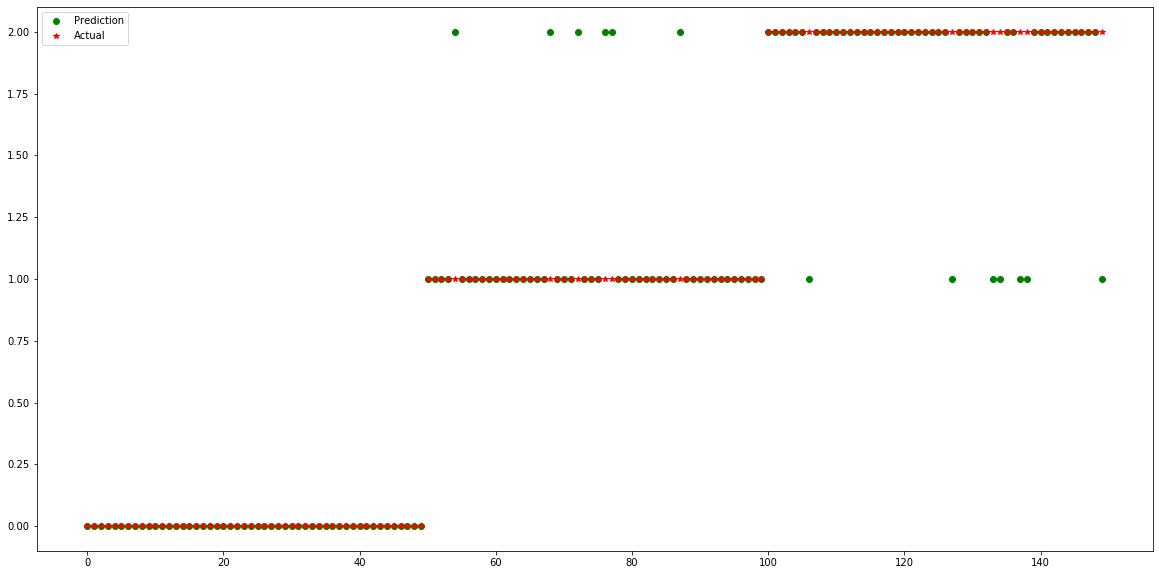

In [12]:
# for i in range(150):
#     p = predict(X[i], weights, bias)
#     p = activated(p)
#     print(Y[i], p)
p = []
p = np.array(activated(predict(X, weights, bias))).reshape(len(X), 1)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(p, 'o', color = 'green', label = 'Prediction')
plt.plot(Y, '*', color = 'red', label = 'Actual')
plt.legend()